# Selecting the most suitable 1x12 drivetrain

# Problem description
A lot of bike riders are using data acquisition devices to log sensor data like GPS, heart rate, cadence and other. A biker is currently riding with 2x10 gear system (2 front chainrings and 10 rear cogs). The rider is considering an upgrade to 1x12 system to benefit from the latest developments in the industry. The following report analysis the most used gear ratio from existing logs (based on cadence and speed) of the user and suggest most suitable number of teeth for single front chainring and gear range for the cassette.

# Introduction
The rider of interest is currently using 2x11 Shimano drive system. The front chainrings are 50 and 34 teeth. The rear cassette is of range 11-28, or more precisely 11-12-13-14-15-17-19-21-23-25-28 teeth. The tyres are ETRTO 25-622 with circumference of 2.105m.

In [69]:
import numpy as np
from datetime import datetime, timedelta
from typing import Dict, Union, Optional,Tuple
import matplotlib.pyplot as plt
import pandas as pd
import os
import fitdecode
import seaborn as sns
import matplotlib.dates as mdates

# Data loading
The user uses a Garmin device. A *.fit file is created for each ride. All fit files are collected in a folder. There are three ride types: mountain, road and on a stationary trainer. The analysis will focus on road rides as the 1x12 upgrade is intended for the road bike.

In [2]:
# Let's print what data we have in a random file
with fitdecode.FitReader('2020-07-30-07-05-29.fit') as fit_file:
    for frame in fit_file:
        if isinstance(frame, fitdecode.records.FitDataMessage) and frame.name == 'record':
             # This frame contains data about a "track point".
            for field in frame.fields:
                print(field.name)
#there are also frame.name = 'lap', but they do not contain the information we need.

timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_

enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
times

timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unkno

timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unkno

altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cade

fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
spe

unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
pos

timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unkno

timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unkno

cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitud

enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
times

timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unkno

unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
en

timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unkno

speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_l

fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
spe

unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
pos

timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unkno

timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unkno

distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence


position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unkn

unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
en

position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart

position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart

distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence


cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitud

cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitud

timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unkno

cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitud

unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
pos

timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unkno

unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
en

timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unkno

unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long


enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
times

distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence
temperature
fractional_cadence
timestamp
position_lat
position_long
distance
enhanced_altitude
altitude
enhanced_speed
speed
unknown_61
unknown_66
unknown_108
heart_rate
cadence


In [3]:
# The names of the columns we will use in our DataFrame. For the data we will be getting
# from the FIT data, we use the same name as the field names to make it easier to parse the data.
# more data is loaded than needed; it might be used in other analysis
RECORDS_COLUMN_NAMES = ['latitude', 'longitude', 'lap', 'altitude', 'timestamp', 'heart_rate', 'cadence', \
                       'speed', 'distance', 'temperature']
# "enhanced_speed", "enhanced_altitude", "fractional_cadence" do not have any additional information

def get_fit_data(frame: fitdecode.records.FitDataMessage) -> Optional[Dict[str, Union[float, int, str, datetime]]]:
    """
    Extract data from a FIT frame, representing a track point,
    and return it as a dict. Only activities with track are returned; stationary activities do not have latitude
    and longitude and the function returns None
    """
    data: Dict[str, Union[float, int, str, datetime]] = {}
    
    if not (frame.has_field('position_lat') and frame.has_field('position_long')):
        # Frame does not have any latitude or longitude data. We will ignore these frames in order to keep things simple
        return None
    else:
        data['latitude'] = frame.get_value('position_lat') / ((2**32) / 360) #saved in degrees
        data['longitude'] = frame.get_value('position_long') / ((2**32) / 360) #saved in degrees
    
    for field in RECORDS_COLUMN_NAMES[3:]:
        if frame.has_field(field):
            data[field] = frame.get_value(field)
    
    return data
    

def get_dataframe(fname: str) -> Tuple[pd.DataFrame]:
    """
    Takes the path to a FIT file (as a string) and returns
    DataFrame, containing data about the individual records.
    """

    records_data = []
    lap_no = 1
    with fitdecode.FitReader(fname) as fit_file:
        for frame in fit_file:
            if isinstance(frame, fitdecode.records.FitDataMessage):
                if frame.name == 'record':
                    single_record_data = get_fit_data(frame)
                    if single_record_data is not None:
                        single_record_data['lap'] = lap_no
                        records_data.append(single_record_data)
                elif frame.name == 'lap':
                    lap_no += 1
    
    # Create DataFrames from the data we have collected. If any information is missing,
    # it will show up as a null value or "NaN" in the DataFrame.
    record_df = pd.DataFrame(records_data, columns=RECORDS_COLUMN_NAMES)
    
    return record_df


# path = '2020-07-30-07-05-29.fit' # Yambol
path = '2017-12-07-08-38-00.fit' # ?


records_df = get_dataframe(path)

In [4]:
def is_road_file(file_path):
    has_cadence = False
    with fitdecode.FitReader(file_path) as fit_file:
        for frame in fit_file:
            if isinstance(frame, fitdecode.records.FitDataMessage):
                if frame.name == 'device_info':
                    for field in frame.fields:
                        if field.name == "antplus_device_type":
                            if field.value == "fitness_equipment":
                                return False
                            if field.value == "bike_cadence":
                                #only the road bike has cadance sensor
                                has_cadence = True
                if frame.name == "record":
                    # we have checked the header 
                    break
    return has_cadence

def get_all_road_rides(folder_path):
    folder_road_rides = pd.DataFrame()
    for entry in os.scandir(folder_path):
        if entry.is_file and entry.name.split(".")[-1] == "fit":
            if is_road_file(entry.path):
                file_frame = get_dataframe(entry.path)
                average_speed = file_frame.speed.mean()
                average_cadance = file_frame.cadence.mean()
                distance = file_frame.distance.iloc[-1]
                print(f"""{entry.name}:
                    average speed = {average_speed}
                    average cadence = {average_cadance}
                    distance = {distance}""")
                folder_road_rides = pd.concat([folder_road_rides, file_frame], ignore_index=True)
    return folder_road_rides

# EDA

Let's load only one ride and inspect the data inside. The same ride is uploaded on https://www.strava.com/activities/5537229796 Comparison with the upload will be made.

In [5]:
road_rides = get_all_road_rides(r"C:\Users\a1048794\OneDrive - PROD - sensata.com Azure AD (sso.sensata.com) (Not O365)\Documents\personal\SoftUni\Data science\project\data")
road_rides

2021-06-27-08-00-53.fit:
                    average speed = 7.703838172560895
                    average cadence = 63.287750865051905
                    distance = 165349.71


,latitude,longitude,lap,altitude,timestamp,heart_rate,cadence,speed,distance,temperature
0,42.671546,23.295498,1,583.4,2021-06-27 05:00:53+00:00,114.0,48.0,4.899,4.90,25
1,42.671560,23.295457,1,585.4,2021-06-27 05:00:54+00:00,115.0,48.0,4.731,9.63,25
2,42.671601,23.295406,1,585.6,2021-06-27 05:00:55+00:00,115.0,32.0,4.796,14.43,25
3,42.671631,23.295350,1,585.4,2021-06-27 05:00:56+00:00,115.0,32.0,4.796,19.22,25
4,42.671647,23.295305,1,585.4,2021-06-27 05:00:57+00:00,114.0,32.0,4.684,23.91,25
...,...,...,...,...,...,...,...,...,...,...
7262,42.685635,23.138972,34,772.2,2021-06-27 11:57:12+00:00,124.0,25.0,1.110,165341.10,35
7263,42.685611,23.139020,34,772.2,2021-06-27 11:57:15+00:00,122.0,0.0,1.997,165346.33,35
7264,42.685612,23.139062,34,771.8,2021-06-27 11:57:17+00:00,120.0,0.0,1.381,165349.71,35
7265,42.685618,23.139071,34,771.8,2021-06-27 11:57:21+00:00,119.0,4.0,0.000,165349.71,35


In [6]:
road_rides.dtypes

latitude                   float64
longitude                  float64
lap                          int64
altitude                   float64
timestamp      datetime64[ns, UTC]
heart_rate                 float64
cadence                    float64
speed                      float64
distance                   float64
temperature                  int64
dtype: object

In [7]:
road_rides.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,7267.0,42.666341,0.046488,42.566613,42.626655,42.682601,42.706885,42.733819
longitude,7267.0,23.649968,0.247663,23.138662,23.436341,23.722136,23.860254,24.001795
lap,7267.0,17.209440,9.188901,1.000000,10.000000,17.000000,24.000000,34.000000
altitude,7267.0,663.015770,103.385607,510.200000,578.200000,637.200000,734.400000,924.200000
heart_rate,7249.0,139.485308,20.567335,72.000000,127.000000,142.000000,155.000000,179.000000
cadence,7225.0,63.287751,34.137560,0.000000,37.000000,80.000000,89.000000,114.000000
speed,7267.0,7.703838,3.842450,0.000000,4.600000,7.521000,10.245000,17.878000
distance,7267.0,83664.625826,46002.432023,4.900000,49117.565000,84490.640000,117117.800000,165349.710000
temperature,7267.0,26.899684,5.011793,19.000000,22.000000,26.000000,31.000000,38.000000


The data seems realistic and comparable with the analysis provided on Strava web page. The measuring units are as follows:
- latitude and longitude : °
- altitude : m
- heart_rate : bpm
- cadence : rpm
- speed : m/s (not km/h)
- distance : m
- temperature : °C

## Sampling rate

At first glance it looks like the sampling is each second. Let's confirm.

In [8]:
sampling_time = [np.NaN]
for i in range(1, len(road_rides)):
    sampling_time.append((road_rides.timestamp.iloc[i] - road_rides.timestamp.iloc[i-1]).total_seconds())
sampling_time = pd.Series(sampling_time)

In [9]:
def to_seconds(x):
    return x.total_seconds()


sampling_time = road_rides.timestamp.diff().apply(to_seconds) #.apply(total_seconds())

In [10]:
sampling_time.unique()

array([      nan, 1.000e+00, 2.000e+00, 3.000e+00, 6.000e+00, 4.000e+00,
       7.000e+00, 5.000e+00, 1.200e+01, 8.000e+00, 9.000e+00, 1.900e+01,
       2.100e+01, 1.000e+01, 1.400e+01, 1.300e+01, 1.500e+01, 1.100e+01,
       1.800e+01, 2.200e+01, 1.700e+01, 2.300e+01, 2.000e+01, 3.100e+01,
       2.500e+01, 2.800e+01, 2.600e+01, 1.600e+01, 1.959e+03, 5.000e+01])

The sampling is not every second. There is also one very long duration of 1959s. Let's try to find what is the logic.

In [11]:
sampling_time.name = "duration"
road_rides = pd.concat([road_rides, sampling_time], axis=1)

In [12]:
road_rides[road_rides.duration > 100]

,latitude,longitude,lap,altitude,timestamp,heart_rate,cadence,speed,distance,temperature,duration
3925,42.655755,23.821555,18,730.2,2021-06-27 09:00:28+00:00,99.0,66.0,6.746,89618.22,26,1959.0


In [13]:
road_rides[3920:3930]

,latitude,longitude,lap,altitude,timestamp,heart_rate,cadence,speed,distance,temperature,duration
3920,42.655982,23.821497,18,728.2,2021-06-27 08:27:38+00:00,139.0,59.0,2.146,89611.47,26,4.0
3921,42.655976,23.821507,18,728.4,2021-06-27 08:27:39+00:00,138.0,59.0,0.000,89611.47,26,1.0
3922,42.655975,23.821510,18,728.4,2021-06-27 08:27:42+00:00,137.0,0.0,0.000,89611.47,26,3.0
3923,42.655975,23.821510,18,728.6,2021-06-27 08:27:43+00:00,137.0,0.0,0.000,89611.47,26,1.0
3924,42.655975,23.821510,18,729.0,2021-06-27 08:27:49+00:00,136.0,0.0,0.000,89611.47,26,6.0
3925,42.655755,23.821555,18,730.2,2021-06-27 09:00:28+00:00,99.0,66.0,6.746,89618.22,26,1959.0
3926,42.655718,23.821624,18,730.0,2021-06-27 09:00:29+00:00,101.0,66.0,7.437,89625.65,26,1.0
3927,42.655605,23.821860,18,729.8,2021-06-27 09:00:32+00:00,101.0,20.0,8.659,89650.44,26,3.0
3928,42.655513,23.822060,18,729.4,2021-06-27 09:00:34+00:00,101.0,0.0,9.293,89668.83,26,2.0
3929,42.655394,23.822349,18,728.6,2021-06-27 09:00:37+00:00,NaN,0.0,9.797,89698.07,26,3.0


Looking into the row with the highest duration and the GPS coordinates, we quickly realize the rider has been on a restaurant stop. It looks like the device manages logging frequency internally, most probably to preserve battery life. 

In [14]:
road_rides[road_rides.duration > 10].sample(10)

,latitude,longitude,lap,altitude,timestamp,heart_rate,cadence,speed,distance,temperature,duration
5147,42.567759,23.705447,22,853.0,2021-06-27 09:56:09+00:00,102.0,0.0,0.0,109597.11,29,13.0
5158,42.567759,23.705447,22,852.4,2021-06-27 09:57:21+00:00,102.0,0.0,0.0,109597.11,30,16.0
5143,42.567759,23.705447,22,853.6,2021-06-27 09:55:38+00:00,108.0,0.0,0.0,109597.11,29,11.0
558,42.706885,23.456879,3,529.2,2021-06-27 05:34:01+00:00,90.0,0.0,0.0,14647.95,20,11.0
602,42.706885,23.456884,3,528.8,2021-06-27 05:39:15+00:00,80.0,0.0,0.0,14647.95,20,11.0
4390,42.620165,23.763566,20,705.4,2021-06-27 09:20:46+00:00,120.0,0.0,0.0,98039.27,29,12.0
571,42.706885,23.456884,3,529.2,2021-06-27 05:35:53+00:00,88.0,0.0,0.0,14647.95,20,14.0
612,42.706885,23.456884,3,528.6,2021-06-27 05:41:05+00:00,76.0,NaN,0.0,14647.95,20,12.0
615,42.706885,23.456884,3,528.6,2021-06-27 05:41:26+00:00,73.0,NaN,0.0,14647.95,20,12.0
339,42.699756,23.369114,2,530.4,2021-06-27 05:18:23+00:00,87.0,0.0,0.0,7323.91,21,15.0


The device increases logging time when the speed and cadence are 0.

## Altitude

In [15]:
pd.isna(road_rides.altitude).any()

False

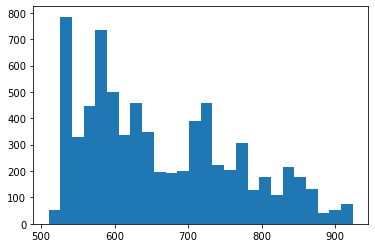

In [16]:
plt.hist(road_rides.altitude, bins="fd")
plt.show()

All entries contain altitude value. The sensor type is barometric.

## Heart rate

In [17]:
road_rides.heart_rate.unique()

array([114., 115., 113., 110., 109., 108., 107., 104., 101., 102., 105.,
       111., 116., 117., 118., 120., 123., 124., 125., 126., 127., 130.,
       132., 133., 134., 136., 137., 138., 139., 141., 140., 135., 131.,
       142., 143., 145., 146., 149., 153., 155., 156., 151., 148., 128.,
       122., 119., 112., 144., 147., 129., 121., 106., 150.,  nan,  99.,
        96.,  95.,  92.,  88.,  85.,  89.,  94.,  91.,  93.,  90.,  87.,
        84., 100.,  97.,  86.,  83., 103.,  98.,  81.,  78.,  75.,  80.,
        79.,  82.,  76.,  77.,  73.,  72., 152., 154., 158., 160., 161.,
       162., 159., 157., 163., 164., 166., 167., 168., 165., 169., 170.,
       171., 172., 173., 174., 175., 176., 177., 178., 179.])

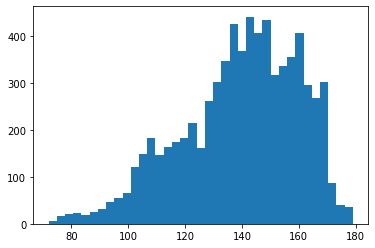

In [18]:
plt.hist(road_rides.heart_rate, bins="fd")
plt.show()

In [19]:
road_rides[pd.isna(road_rides.heart_rate)]

,latitude,longitude,lap,altitude,timestamp,heart_rate,cadence,speed,distance,temperature,duration
316,42.699740,23.368918,2,531.2,2021-06-27 05:15:33+00:00,NaN,0.0,4.852,7307.23,20,1.0
2365,42.703722,23.912650,12,872.2,2021-06-27 07:12:30+00:00,NaN,33.0,14.882,55790.76,21,2.0
2384,42.703427,23.916309,12,848.4,2021-06-27 07:12:56+00:00,NaN,0.0,13.688,56163.61,21,1.0
2385,42.703408,23.916463,12,847.2,2021-06-27 07:12:57+00:00,NaN,0.0,14.052,56177.66,21,1.0
2395,42.702626,23.918040,12,837.6,2021-06-27 07:13:08+00:00,NaN,0.0,15.498,56341.18,21,1.0
2396,42.702669,23.918225,12,836.4,2021-06-27 07:13:09+00:00,NaN,0.0,15.704,56356.88,21,1.0
2427,42.702594,23.922981,12,804.2,2021-06-27 07:13:47+00:00,NaN,0.0,15.414,56929.23,22,1.0
2428,42.702431,23.923335,12,802.2,2021-06-27 07:13:49+00:00,NaN,0.0,15.256,56959.74,22,2.0
2453,42.702987,23.924390,12,784.0,2021-06-27 07:14:18+00:00,NaN,0.0,9.751,57298.08,22,1.0
2454,42.703046,23.924475,12,783.4,2021-06-27 07:14:19+00:00,NaN,0.0,8.640,57306.72,22,1.0


There are some missing hear rate entries, most probably due to device communication issue or pad electrical contact to the body. The amount of missing data is low and it is not also not essential for the defined problem.

Heart rate could be used for some approximation for power. Due to physiological reasons, the heart rate has significant lag from power output.

## Cadence

In [20]:
np.sort(road_rides.cadence.unique())

array([  0.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114.,  nan])

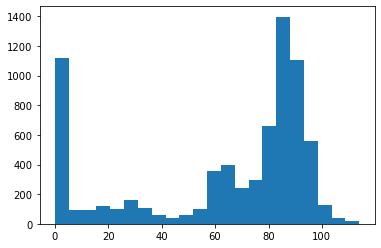

In [21]:
plt.hist(road_rides.cadence, bins="fd")
plt.show()

In [22]:
road_rides[pd.isna(road_rides.cadence)]

,latitude,longitude,lap,altitude,timestamp,heart_rate,cadence,speed,distance,temperature,duration
605,42.706885,23.456884,3,528.8,2021-06-27 05:39:43+00:00,77.0,NaN,0.000,14647.95,20,4.0
606,42.706885,23.456884,3,529.0,2021-06-27 05:40:03+00:00,81.0,NaN,0.000,14647.95,20,20.0
607,42.706885,23.456884,3,529.0,2021-06-27 05:40:06+00:00,85.0,NaN,0.000,14647.95,20,3.0
608,42.706885,23.456884,3,528.6,2021-06-27 05:40:37+00:00,82.0,NaN,0.000,14647.95,20,31.0
609,42.706885,23.456884,3,528.6,2021-06-27 05:40:45+00:00,79.0,NaN,0.000,14647.95,20,8.0
610,42.706885,23.456884,3,528.6,2021-06-27 05:40:49+00:00,76.0,NaN,0.000,14647.95,20,4.0
611,42.706885,23.456884,3,528.6,2021-06-27 05:40:53+00:00,79.0,NaN,0.000,14647.95,20,4.0
612,42.706885,23.456884,3,528.6,2021-06-27 05:41:05+00:00,76.0,NaN,0.000,14647.95,20,12.0
613,42.706885,23.456884,3,528.6,2021-06-27 05:41:08+00:00,73.0,NaN,0.000,14647.95,20,3.0
614,42.706885,23.456884,3,528.6,2021-06-27 05:41:14+00:00,76.0,NaN,0.000,14647.95,20,6.0


In [23]:
road_rides[640:655]

,latitude,longitude,lap,altitude,timestamp,heart_rate,cadence,speed,distance,temperature,duration
640,42.706885,23.456884,3,528.0,2021-06-27 05:45:42+00:00,78.0,NaN,0.000,14647.95,20,14.0
641,42.706885,23.456884,3,528.0,2021-06-27 05:45:45+00:00,75.0,NaN,0.000,14647.95,20,3.0
642,42.706885,23.456884,3,528.0,2021-06-27 05:45:51+00:00,72.0,NaN,0.000,14647.95,20,6.0
643,42.706886,23.456884,3,528.0,2021-06-27 05:45:56+00:00,77.0,NaN,0.000,14648.05,20,5.0
644,42.706913,23.456874,3,528.0,2021-06-27 05:45:58+00:00,82.0,NaN,2.351,14652.93,20,2.0
645,42.706925,23.456858,3,528.0,2021-06-27 05:45:59+00:00,83.0,NaN,2.678,14655.61,20,1.0
646,42.706938,23.456839,3,528.0,2021-06-27 05:46:00+00:00,85.0,NaN,2.725,14658.33,20,1.0
647,42.706953,23.456819,3,528.0,2021-06-27 05:46:01+00:00,88.0,0.0,3.079,14661.41,20,1.0
648,42.707001,23.456792,3,528.0,2021-06-27 05:46:03+00:00,91.0,0.0,2.622,14666.92,20,2.0
649,42.707052,23.456800,3,528.0,2021-06-27 05:46:05+00:00,94.0,0.0,3.210,14672.97,20,2.0


There are some entries for cadence with nan value. These values are recorded when the cranks are not rotated. The nan values become 0 and than return to normal. Checking the GPS coordinates reveals that this is a gas station where the teammates meet for the ride. The bike was not moving.

In [24]:
road_rides[(road_rides.cadence == 0) & (road_rides.speed > 0)]

,latitude,longitude,lap,altitude,timestamp,heart_rate,cadence,speed,distance,temperature,duration
6,42.671719,23.295143,1,585.2,2021-06-27 05:01:00+00:00,110.0,0.0,4.581,37.78,25,2.0
7,42.671739,23.295108,1,585.4,2021-06-27 05:01:01+00:00,109.0,0.0,4.563,42.35,25,1.0
8,42.671772,23.295050,1,585.0,2021-06-27 05:01:02+00:00,108.0,0.0,4.563,46.91,25,1.0
9,42.671810,23.294953,1,584.8,2021-06-27 05:01:04+00:00,108.0,0.0,5.020,56.80,25,2.0
20,42.672510,23.295226,1,584.8,2021-06-27 05:01:22+00:00,105.0,0.0,6.186,148.08,25,2.0
...,...,...,...,...,...,...,...,...,...,...,...
7012,42.706526,23.153673,33,642.0,2021-06-27 11:43:08+00:00,138.0,0.0,6.933,162130.74,35,3.0
7035,42.705199,23.148504,33,644.0,2021-06-27 11:44:25+00:00,127.0,0.0,1.652,162588.24,35,4.0
7036,42.705197,23.148478,33,644.2,2021-06-27 11:44:27+00:00,124.0,0.0,1.297,162590.35,35,2.0
7263,42.685611,23.139020,34,772.2,2021-06-27 11:57:15+00:00,122.0,0.0,1.997,165346.33,35,3.0


There are a lot of entries when the bike is moving by inertia and the cranks are not rotated.

In [25]:
road_rides[(road_rides.cadence > 0) & (road_rides.cadence < 30)] # this range is really low cadence

,latitude,longitude,lap,altitude,timestamp,heart_rate,cadence,speed,distance,temperature,duration
10,42.671826,23.294951,1,585.0,2021-06-27 05:01:05+00:00,108.0,25.0,5.197,61.99,25,1.0
11,42.671919,23.295020,1,585.0,2021-06-27 05:01:08+00:00,107.0,25.0,5.729,79.08,25,3.0
12,42.671975,23.294993,1,585.0,2021-06-27 05:01:09+00:00,107.0,25.0,5.561,84.64,25,1.0
13,42.672063,23.294997,1,585.0,2021-06-27 05:01:11+00:00,107.0,25.0,5.365,95.55,25,2.0
14,42.672109,23.295174,1,585.0,2021-06-27 05:01:12+00:00,107.0,14.0,5.244,100.79,25,1.0
...,...,...,...,...,...,...,...,...,...,...,...
7154,42.695021,23.148388,33,711.0,2021-06-27 11:50:36+00:00,141.0,21.0,4.311,163994.40,33,4.0
7260,42.685669,23.138902,34,772.2,2021-06-27 11:57:08+00:00,129.0,25.0,2.771,165334.41,35,3.0
7261,42.685640,23.138962,34,772.2,2021-06-27 11:57:11+00:00,125.0,25.0,1.110,165339.99,35,3.0
7262,42.685635,23.138972,34,772.2,2021-06-27 11:57:12+00:00,124.0,25.0,1.110,165341.10,35,1.0


In [26]:
# road_rides[17:25]

In [27]:
# road_rides[90:110]

In [28]:
# road_rides[270:280]

In [29]:
road_rides[(road_rides.cadence > 0) & (road_rides.cadence < 30)].sample(20) 

,latitude,longitude,lap,altitude,timestamp,heart_rate,cadence,speed,distance,temperature,duration
491,42.709129,23.427502,3,529.4,2021-06-27 05:28:59+00:00,137.0,29.0,8.995,12237.74,21,4.0
479,42.709262,23.423771,3,530.6,2021-06-27 05:28:17+00:00,128.0,15.0,6.158,11928.20,21,2.0
543,42.707121,23.455984,3,529.8,2021-06-27 05:33:13+00:00,103.0,8.0,5.738,14570.25,20,1.0
5402,42.594560,23.663248,24,679.2,2021-06-27 10:06:53+00:00,161.0,18.0,11.747,115452.18,28,4.0
4189,42.623365,23.803952,19,644.0,2021-06-27 09:10:33+00:00,118.0,17.0,10.086,94264.67,29,3.0
2878,42.646380,24.001786,14,549.4,2021-06-27 07:33:10+00:00,141.0,20.0,11.206,67827.93,27,1.0
6355,42.698835,23.316426,30,555.2,2021-06-27 11:02:54+00:00,119.0,6.0,5.346,147510.91,32,2.0
15,42.672155,23.295264,1,585.0,2021-06-27 05:01:13+00:00,107.0,14.0,5.011,105.80,25,1.0
4904,42.584188,23.725362,22,845.0,2021-06-27 09:43:30+00:00,148.0,6.0,10.618,105659.58,30,1.0
2897,42.642061,23.996328,14,540.0,2021-06-27 07:34:06+00:00,138.0,27.0,10.404,68503.70,27,4.0


There are a moderate amount of entries with low cadence. Picking random samples and checking the GPS coordinates, indicates most of them are in urban areas where the rider has to adapt to signal lights and road traffic. This rates  happen during acceleration from a stop when too high gear is engaged. Other possible use of low cadence is during out of the saddle efforts.

## Speed

In [30]:
pd.isna(road_rides.speed).any()

False

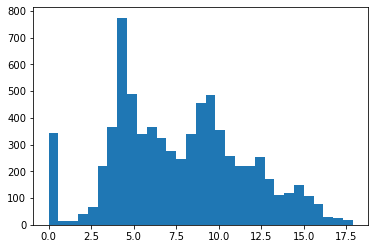

In [31]:
plt.hist(road_rides.speed, bins="fd")
plt.show()

Every entry has a speed value, that could be 0m/s.

## Distance

There are two possible ways to calculate distance
- by integrating speed over time
- by calculating the length of the GPS track.

Integration over the speed will be performed to compare the results.

In [39]:
road_rides

,latitude,longitude,lap,altitude,timestamp,heart_rate,cadence,speed,distance,temperature,duration
0,42.671546,23.295498,1,583.4,2021-06-27 05:00:53+00:00,114.0,48.0,4.899,4.90,25,NaN
1,42.671560,23.295457,1,585.4,2021-06-27 05:00:54+00:00,115.0,48.0,4.731,9.63,25,1.0
2,42.671601,23.295406,1,585.6,2021-06-27 05:00:55+00:00,115.0,32.0,4.796,14.43,25,1.0
3,42.671631,23.295350,1,585.4,2021-06-27 05:00:56+00:00,115.0,32.0,4.796,19.22,25,1.0
4,42.671647,23.295305,1,585.4,2021-06-27 05:00:57+00:00,114.0,32.0,4.684,23.91,25,1.0
...,...,...,...,...,...,...,...,...,...,...,...
7262,42.685635,23.138972,34,772.2,2021-06-27 11:57:12+00:00,124.0,25.0,1.110,165341.10,35,1.0
7263,42.685611,23.139020,34,772.2,2021-06-27 11:57:15+00:00,122.0,0.0,1.997,165346.33,35,3.0
7264,42.685612,23.139062,34,771.8,2021-06-27 11:57:17+00:00,120.0,0.0,1.381,165349.71,35,2.0
7265,42.685618,23.139071,34,771.8,2021-06-27 11:57:21+00:00,119.0,4.0,0.000,165349.71,35,4.0


In [34]:
calculated_distance = (road_rides.duration * road_rides.speed).cumsum()
calculated_distance.name = "calc_distance"
calculated_distance

0              NaN
1            4.731
2            9.527
3           14.323
4           19.007
           ...    
7262    178754.284
7263    178760.275
7264    178763.037
7265    178763.037
7266    178763.037
Name: calc_distance, Length: 7267, dtype: float64

The first entry for distance is known to the device. Most probably there is an initiation sensor reading that allows it to be calculated. The total distance differ.

In [36]:
calculated_distance[0] = 0
calculated_distance = calculated_distance + road_rides.distance[0]
calculated_distance

0            4.900
1            9.631
2           14.427
3           19.223
4           23.907
           ...    
7262    178759.184
7263    178765.175
7264    178767.937
7265    178767.937
7266    178767.937
Name: calc_distance, Length: 7267, dtype: float64

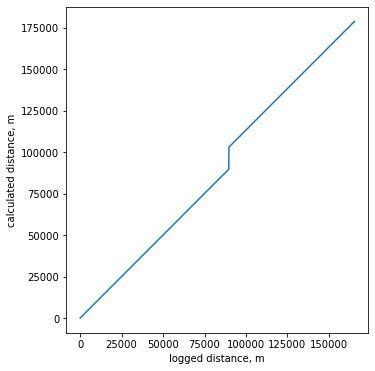

In [38]:
plt.figure(figsize=(6,6))
plt.plot(road_rides.distance, calculated_distance)
plt.xlabel("logged distance, m")
plt.ylabel("calculated distance, m")
plt.gca().set_aspect('equal')
plt.show()

In [41]:
road_rides = pd.concat([road_rides, calculated_distance], axis=1)
road_rides[(road_rides.duration * road_rides.speed) > 100]

,latitude,longitude,lap,altitude,timestamp,heart_rate,cadence,speed,distance,temperature,duration,calc_distance
286,42.697928,23.360775,2,529.2,2021-06-27 05:13:50+00:00,136.0,32.0,9.583,6625.03,20,12.0,6634.811
3925,42.655755,23.821555,18,730.2,2021-06-27 09:00:28+00:00,99.0,66.0,6.746,89618.22,26,1959.0,102915.992
6534,42.709744,23.273300,31,578.8,2021-06-27 11:13:45+00:00,164.0,91.0,10.460,151294.11,34,50.0,164716.298


In [43]:
strange_secton = road_rides[3920:3930]
strange_secton

,latitude,longitude,lap,altitude,timestamp,heart_rate,cadence,speed,distance,temperature,duration,calc_distance
3920,42.655982,23.821497,18,728.2,2021-06-27 08:27:38+00:00,139.0,59.0,2.146,89611.47,26,4.0,89700.578
3921,42.655976,23.821507,18,728.4,2021-06-27 08:27:39+00:00,138.0,59.0,0.000,89611.47,26,1.0,89700.578
3922,42.655975,23.821510,18,728.4,2021-06-27 08:27:42+00:00,137.0,0.0,0.000,89611.47,26,3.0,89700.578
3923,42.655975,23.821510,18,728.6,2021-06-27 08:27:43+00:00,137.0,0.0,0.000,89611.47,26,1.0,89700.578
3924,42.655975,23.821510,18,729.0,2021-06-27 08:27:49+00:00,136.0,0.0,0.000,89611.47,26,6.0,89700.578
3925,42.655755,23.821555,18,730.2,2021-06-27 09:00:28+00:00,99.0,66.0,6.746,89618.22,26,1959.0,102915.992
3926,42.655718,23.821624,18,730.0,2021-06-27 09:00:29+00:00,101.0,66.0,7.437,89625.65,26,1.0,102923.429
3927,42.655605,23.821860,18,729.8,2021-06-27 09:00:32+00:00,101.0,20.0,8.659,89650.44,26,3.0,102949.406
3928,42.655513,23.822060,18,729.4,2021-06-27 09:00:34+00:00,101.0,0.0,9.293,89668.83,26,2.0,102967.992
3929,42.655394,23.822349,18,728.6,2021-06-27 09:00:37+00:00,NaN,0.0,9.797,89698.07,26,3.0,102997.383


In [44]:
strange_secton.distance.diff()

3920      NaN
3921     0.00
3922     0.00
3923     0.00
3924     0.00
3925     6.75
3926     7.43
3927    24.79
3928    18.39
3929    29.24
Name: distance, dtype: float64

In [45]:
strange_secton.calc_distance.diff()

3920          NaN
3921        0.000
3922        0.000
3923        0.000
3924        0.000
3925    13215.414
3926        7.437
3927       25.977
3928       18.586
3929       29.391
Name: calc_distance, dtype: float64

Looking at rows 3925 and the following, it is indicated the distance increment differ between the calculation done by Garmin and the calculation proposed here. Row 3925 is with long duration and it represents the break at a restaurnat discussed above. It is not very clear (for me) how exactly the distance is calculated. The distance calculated by the Garmin device will be accepted as the correct one.

In [48]:
road_rides = road_rides.drop(columns="calc_distance")

## Temperature

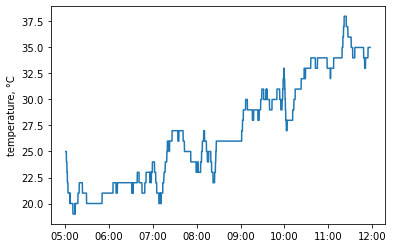

In [70]:
plt.plot(road_rides.timestamp, road_rides.temperature)
xformatter = mdates.DateFormatter('%H:%M')
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
plt.ylabel("temperature, °C")
plt.show()

Temperature increases towards lunch time. Nothing interesting.

## Generic correlations

In [50]:
road_rides.corr()

,latitude,longitude,lap,altitude,heart_rate,cadence,speed,distance,temperature,duration
latitude,1.000000,-0.252283,-0.349512,-0.240498,-0.171262,0.056859,-0.096773,-0.349504,-0.344116,0.003210
longitude,-0.252283,1.000000,-0.385375,0.431167,0.052227,-0.032226,0.143518,-0.385880,-0.480230,-0.009993
lap,-0.349512,-0.385375,1.000000,0.104041,0.192141,0.019766,-0.053242,0.999500,0.940143,-0.000166
altitude,-0.240498,0.431167,0.104041,1.000000,0.072882,-0.144861,-0.113437,0.105784,-0.043706,-0.014530
heart_rate,-0.171262,0.052227,0.192141,0.072882,1.000000,0.554066,-0.166892,0.188692,0.142657,-0.025190
cadence,0.056859,-0.032226,0.019766,-0.144861,0.554066,1.000000,0.092086,0.017199,0.024237,0.009313
speed,-0.096773,0.143518,-0.053242,-0.113437,-0.166892,0.092086,1.000000,-0.057469,-0.058112,-0.021411
distance,-0.349504,-0.385880,0.999500,0.105784,0.188692,0.017199,-0.057469,1.000000,0.939776,0.000502
temperature,-0.344116,-0.480230,0.940143,-0.043706,0.142657,0.024237,-0.058112,0.939776,1.000000,-0.000350
duration,0.003210,-0.009993,-0.000166,-0.014530,-0.025190,0.009313,-0.021411,0.000502,-0.000350,1.000000


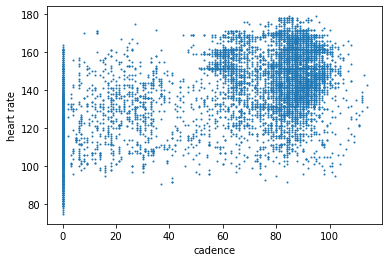

In [71]:
# some correlation between heart rate and cadance is seen; this is expected from scientific point of view.
plt.scatter(road_rides.cadence, road_rides.heart_rate, s=1)
plt.xlabel("cadence")
plt.ylabel("heart rate")
plt.show()

There are some obvious correlations between lap number - distance and lap number - temperature with no added value.
The minimal correlation between cadence and heart rate does not add value too. 
Other possible correlation might appear between slope and heart rate.

# Gear ratios

The gear ratio is calculated from the speed and cadence. The gear ratio is the ratio between the number of teeth on the chainring divided by the number of teeth on the selected rear cog.

In [84]:
TYRE_CIRCUMFERENCE = 2.105 # in m
gear_ratios = (road_rides.speed / TYRE_CIRCUMFERENCE) / (road_rides.cadence / 60) # dimensionless; number of chainring theeth divided by the cog theeth
gear_ratios.name = "gear_ratio"

In [87]:
road_rides = pd.concat([road_rides, gear_ratios], axis=1)
road_rides

,latitude,longitude,lap,altitude,timestamp,heart_rate,cadence,speed,distance,temperature,duration,gear_ratio
0,42.671546,23.295498,1,583.4,2021-06-27 05:00:53+00:00,114.0,48.0,4.899,4.90,25,NaN,2.909145
1,42.671560,23.295457,1,585.4,2021-06-27 05:00:54+00:00,115.0,48.0,4.731,9.63,25,1.0,2.809382
2,42.671601,23.295406,1,585.6,2021-06-27 05:00:55+00:00,115.0,32.0,4.796,14.43,25,1.0,4.271971
3,42.671631,23.295350,1,585.4,2021-06-27 05:00:56+00:00,115.0,32.0,4.796,19.22,25,1.0,4.271971
4,42.671647,23.295305,1,585.4,2021-06-27 05:00:57+00:00,114.0,32.0,4.684,23.91,25,1.0,4.172209
...,...,...,...,...,...,...,...,...,...,...,...,...
7262,42.685635,23.138972,34,772.2,2021-06-27 11:57:12+00:00,124.0,25.0,1.110,165341.10,35,1.0,1.265558
7263,42.685611,23.139020,34,772.2,2021-06-27 11:57:15+00:00,122.0,0.0,1.997,165346.33,35,3.0,inf
7264,42.685612,23.139062,34,771.8,2021-06-27 11:57:17+00:00,120.0,0.0,1.381,165349.71,35,2.0,inf
7265,42.685618,23.139071,34,771.8,2021-06-27 11:57:21+00:00,119.0,4.0,0.000,165349.71,35,4.0,0.000000


In [79]:
gear_ratios.min(), gear_ratios.max()

(0.0, inf)

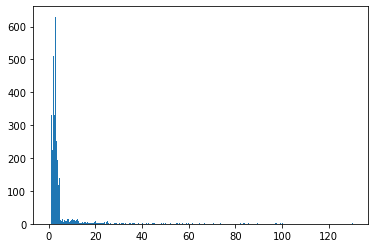

In [90]:
plt.hist(gear_ratios[gear_ratios < 200], bins="fd")
# plt.ylim(0,10)
plt.show()

In [89]:
gear_ratios[gear_ratios > 20].count()

990

There is a problem with such direct approach: dividing by 0 cadence results in infinity. When the bike is moved by inertia, the formula indicates infinite gear ratio; but in reality, in this case the gear ratio cannot be determined (any gear could be engaged when freewheeling). Not knowing the gear ratio when freewheeling is not a big concern as the rider is simply not turning the cranks. We should think of what is the best usage metric. Here are some proposals with comments:
- number of records in the dataframe - not good as the duration differs
- number of kilometers at a given gear ratio - would indicate high usage of fast gears
- number of crank turns at a given ratio - assuming a constant power per rotation coming from the rider, would indicate the total energy used at a give ratio. The analysis will continue with this approach.
- number of hours at a given gear ratio - if the power input from the rider is constant, this would also be indication for the total amount of energy spent at a give gear ratio.
- number of chain engagement/disengagement in the cogs - good indicator for wear, but difficult to calculate with two chainrings.

The highest possible gear ratio of the current setup can be calculated by dividing the teeth of the largest chainring to the teeth of the smallest cog. If we exclude any gear ratio higher than that, we will exclude the freewheeling.

In [210]:
HIGHEST_GEAR = 50.0 / 11.0
HIGHEST_GEAR

4.545454545454546

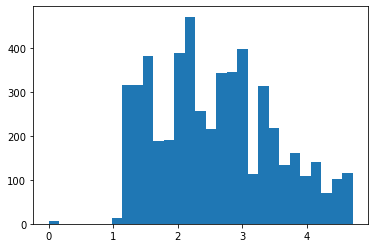

In [110]:
plt.hist(road_rides.gear_ratio[road_rides.gear_ratio <= HIGHEST_GEAR], bins="fd")
plt.show()

In [100]:
road_rides[road_rides.gear_ratio < 1]

,latitude,longitude,lap,altitude,timestamp,heart_rate,cadence,speed,distance,temperature,duration,gear_ratio
1956,42.717119,23.874636,11,769.8,2021-06-27 06:57:49+00:00,156.0,15.0,0.0,51265.87,22,5.0,0.0
1957,42.717119,23.874636,11,770.0,2021-06-27 06:57:51+00:00,155.0,15.0,0.0,51265.87,22,2.0,0.0
2465,42.702785,23.925150,12,777.4,2021-06-27 07:14:36+00:00,98.0,7.0,0.0,57369.28,22,3.0,0.0
2468,42.702764,23.925129,12,777.4,2021-06-27 07:14:42+00:00,103.0,7.0,0.0,57370.51,22,2.0,0.0
3921,42.655976,23.821507,18,728.4,2021-06-27 08:27:39+00:00,138.0,59.0,0.0,89611.47,26,1.0,0.0
6611,42.708705,23.251921,31,592.2,2021-06-27 11:18:34+00:00,143.0,4.0,0.0,153144.90,34,7.0,0.0
7265,42.685618,23.139071,34,771.8,2021-06-27 11:57:21+00:00,119.0,4.0,0.0,165349.71,35,4.0,0.0


In [102]:
road_rides[2460:2470]

,latitude,longitude,lap,altitude,timestamp,heart_rate,cadence,speed,distance,temperature,duration,gear_ratio
2460,42.702922,23.924962,12,780.0,2021-06-27 07:14:27+00:00,100.0,0.0,4.451,57350.39,22,1.0,inf
2461,42.702896,23.925008,12,779.4,2021-06-27 07:14:28+00:00,100.0,16.0,4.096,57354.48,22,1.0,7.296912
2462,42.702855,23.925091,12,778.6,2021-06-27 07:14:30+00:00,99.0,16.0,3.368,57361.49,22,2.0,6.000000
2463,42.702810,23.925139,12,778.0,2021-06-27 07:14:32+00:00,98.0,16.0,2.790,57367.08,22,2.0,4.970309
2464,42.702791,23.925149,12,777.6,2021-06-27 07:14:33+00:00,97.0,16.0,2.202,57369.28,22,1.0,3.922803
2465,42.702785,23.925150,12,777.4,2021-06-27 07:14:36+00:00,98.0,7.0,0.000,57369.28,22,3.0,0.000000
2466,42.702775,23.925141,12,777.4,2021-06-27 07:14:39+00:00,101.0,7.0,0.411,57370.10,22,3.0,1.673566
2467,42.702765,23.925132,12,777.4,2021-06-27 07:14:40+00:00,102.0,7.0,0.411,57370.51,22,1.0,1.673566
2468,42.702764,23.925129,12,777.4,2021-06-27 07:14:42+00:00,103.0,7.0,0.000,57370.51,22,2.0,0.000000
2469,42.702764,23.925129,12,777.6,2021-06-27 07:14:47+00:00,100.0,0.0,0.000,57370.51,22,5.0,NaN


A couple of gear ratios are equal to 0, due to speed equal to 0 and some cadence. The data indicates this happens during transition periods to stop. It could also happen if the rider is back pedaling.

In [104]:
LOWEST_GEAR = 34.0 / 28.0
LOWEST_GEAR

1.2142857142857142

In [105]:
road_rides[road_rides.gear_ratio < LOWEST_GEAR]

,latitude,longitude,lap,altitude,timestamp,heart_rate,cadence,speed,distance,temperature,duration,gear_ratio
1953,42.717113,23.874516,11,768.4,2021-06-27 06:57:39+00:00,163.0,71.0,2.939,51255.97,22,1.0,1.179887
1954,42.717120,23.874561,11,768.4,2021-06-27 06:57:40+00:00,163.0,71.0,2.557,51258.52,22,1.0,1.026530
1956,42.717119,23.874636,11,769.8,2021-06-27 06:57:49+00:00,156.0,15.0,0.000,51265.87,22,5.0,0.000000
1957,42.717119,23.874636,11,770.0,2021-06-27 06:57:51+00:00,155.0,15.0,0.000,51265.87,22,2.0,0.000000
2465,42.702785,23.925150,12,777.4,2021-06-27 07:14:36+00:00,98.0,7.0,0.000,57369.28,22,3.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
7253,42.686017,23.138795,34,769.0,2021-06-27 11:56:47+00:00,136.0,66.0,2.734,165282.68,35,5.0,1.180739
7254,42.685978,23.138758,34,769.6,2021-06-27 11:56:49+00:00,136.0,63.0,2.491,165287.86,35,2.0,1.127022
7256,42.685882,23.138714,34,770.4,2021-06-27 11:56:54+00:00,136.0,52.0,2.025,165298.96,35,2.0,1.109995
7258,42.685803,23.138667,34,771.4,2021-06-27 11:56:59+00:00,135.0,53.0,1.997,165309.97,35,1.0,1.073993


In [107]:
road_rides[1950:1965]

,latitude,longitude,lap,altitude,timestamp,heart_rate,cadence,speed,distance,temperature,duration,gear_ratio
1950,42.717097,23.874179,11,766.2,2021-06-27 06:57:31+00:00,168.0,69.0,4.451,51227.01,22,1.0,1.838686
1951,42.717112,23.874314,11,767.2,2021-06-27 06:57:34+00:00,167.0,26.0,3.779,51238.59,22,3.0,4.142883
1952,42.717113,23.874475,11,768.2,2021-06-27 06:57:38+00:00,164.0,78.0,3.480,51253.03,22,4.0,1.271697
1953,42.717113,23.874516,11,768.4,2021-06-27 06:57:39+00:00,163.0,71.0,2.939,51255.97,22,1.0,1.179887
1954,42.717120,23.874561,11,768.4,2021-06-27 06:57:40+00:00,163.0,71.0,2.557,51258.52,22,1.0,1.026530
1955,42.717119,23.874631,11,769.4,2021-06-27 06:57:44+00:00,159.0,17.0,1.409,51265.87,22,4.0,2.362442
1956,42.717119,23.874636,11,769.8,2021-06-27 06:57:49+00:00,156.0,15.0,0.000,51265.87,22,5.0,0.000000
1957,42.717119,23.874636,11,770.0,2021-06-27 06:57:51+00:00,155.0,15.0,0.000,51265.87,22,2.0,0.000000
1958,42.717119,23.874636,11,769.8,2021-06-27 06:57:54+00:00,152.0,0.0,0.000,51265.87,22,3.0,NaN
1959,42.717119,23.874636,11,769.8,2021-06-27 06:58:00+00:00,149.0,0.0,0.000,51265.87,23,6.0,NaN


In [109]:
road_rides[7240:7265]

,latitude,longitude,lap,altitude,timestamp,heart_rate,cadence,speed,distance,temperature,duration,gear_ratio
7240,42.687181,23.140085,34,760.6,2021-06-27 11:55:54+00:00,133.0,82.0,3.406,165117.46,35,7.0,1.183941
7241,42.687156,23.140058,34,760.6,2021-06-27 11:55:55+00:00,133.0,80.0,3.396,165120.86,35,1.0,1.209976
7242,42.686974,23.139852,34,761.6,2021-06-27 11:56:03+00:00,133.0,77.0,3.228,165147.44,35,8.0,1.194929
7243,42.686949,23.139828,34,761.8,2021-06-27 11:56:04+00:00,133.0,75.0,3.163,165150.61,35,1.0,1.202090
7244,42.686813,23.139681,34,762.8,2021-06-27 11:56:10+00:00,132.0,72.0,3.042,165169.41,35,6.0,1.204276
7245,42.686749,23.139600,34,763.2,2021-06-27 11:56:13+00:00,130.0,77.0,3.275,165179.02,35,3.0,1.212327
7246,42.686660,23.139501,34,763.8,2021-06-27 11:56:17+00:00,130.0,74.0,3.182,165191.90,35,4.0,1.225653
7247,42.686573,23.139399,34,764.8,2021-06-27 11:56:21+00:00,131.0,74.0,3.144,165204.44,35,4.0,1.211016
7248,42.686553,23.139372,34,765.0,2021-06-27 11:56:22+00:00,131.0,73.0,3.107,165207.55,35,1.0,1.213158
7249,42.686398,23.139198,34,765.8,2021-06-27 11:56:29+00:00,132.0,74.0,3.163,165229.24,35,7.0,1.218335


Again, gear ratio of range is happening during acceleration and stopping.

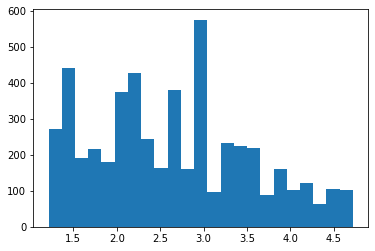

In [111]:
plt.hist(road_rides.gear_ratio[(road_rides.gear_ratio <= HIGHEST_GEAR) & (road_rides.gear_ratio >= LOWEST_GEAR)], bins="fd")
plt.show()

There pre-defined gear-ratios. The code below calculates them and sorts the data set into bins representative for the current 2x11 setup. 

In [222]:
CHAINRINGS = np.array([34, 50])
COGS = np.array([11, 12, 13, 14, 15, 17, 19, 21, 23, 25, 28])
low_half = CHAINRINGS[0] / COGS # it is not good idea to ride the chain at diagonal
high_half = CHAINRINGS[1] / COGS #[:-3]

In [223]:
low_half

array([3.09090909, 2.83333333, 2.61538462, 2.42857143, 2.26666667,
       2.        , 1.78947368, 1.61904762, 1.47826087, 1.36      ,
       1.21428571])

In [224]:
high_half

array([4.54545455, 4.16666667, 3.84615385, 3.57142857, 3.33333333,
       2.94117647, 2.63157895, 2.38095238, 2.17391304, 2.        ,
       1.78571429])

In [214]:
available_ratios = np.sort(np.concatenate((high_half, low_half)))
available_ratios

array([1.21428571, 1.36      , 1.47826087, 1.61904762, 1.78947368,
       2.        , 2.26666667, 2.38095238, 2.42857143, 2.63157895,
       2.94117647, 3.33333333, 3.57142857, 3.84615385, 4.16666667,
       4.54545455])

In [215]:
len(available_ratios)

16

In [216]:
available_ratios[0:2]

array([1.21428571, 1.36      ])

In [217]:
edges = []
for i in range(len(available_ratios)-1):
    edges.append(0.5 * (available_ratios[i] + available_ratios[i+1]))
edges.append(2*available_ratios[0] - edges[0])
edges.append(2*available_ratios[-1] - edges[-2]) # one value has already been added to the end
edges = np.array(edges)
edges = np.sort(edges)
edges

array([1.14142857, 1.28714286, 1.41913043, 1.54865424, 1.70426065,
       1.89473684, 2.13333333, 2.32380952, 2.4047619 , 2.53007519,
       2.78637771, 3.1372549 , 3.45238095, 3.70879121, 4.00641026,
       4.35606061, 4.73484848])

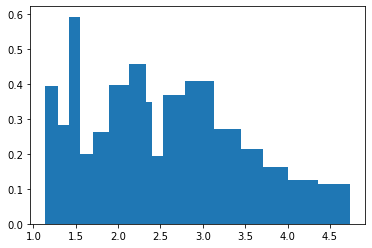

In [218]:
plt.hist(road_rides.gear_ratio[(road_rides.gear_ratio <= edges[-1]) & (road_rides.gear_ratio >= edges[0])], bins=edges, density=True)
plt.show()

TODO: the number of entries is not representative for the duration at a given gar ratio!!!

TODO: check why density=True/False changes so much the hist graph

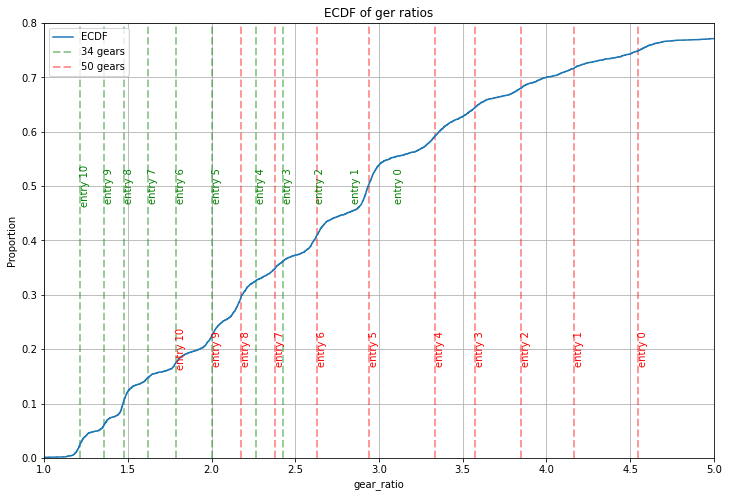

In [262]:
plt.figure(figsize=(12,8))
sns.ecdfplot(data=road_rides.gear_ratio, label=f"ECDF")
# plt.vlines(available_ratios, 0, 1, color="red", lw=2, alpha=0.5, linestyles="dashed", label="set ratios")
plt.vlines(low_half[3:], 0, 1, color="green", lw=2, alpha=0.4, linestyles="dashed", label="34 gears")
plt.vlines(high_half[:-2], 0, 1, color="red", lw=2, alpha=0.4, linestyles="dashed", label="50 gears")

# plt.vlines(edges, 0, 1, color="green", lw=1, alpha=0.5, linestyles="dashed", label="gear ratio edges")
for i, x in enumerate(low_half):
    plt.text(x, 0.5, "entry %d" % i, rotation=90, verticalalignment='center', color="green")
    
for i, x in enumerate(high_half):
    plt.text(x, 0.2, "entry %d" % i, rotation=90, verticalalignment='center', color="red")
    
plt.xlim(1, 5) 
plt.ylim(0, 0.8)
plt.title("ECDF of ger ratios")
plt.legend()
plt.grid()
plt.show()

In [204]:
# available_ratios

In [308]:
COGS

array([11, 12, 13, 14, 15, 17, 19, 21, 23, 25, 28])

16 steps are seen on the graph. Each step represent one gear ratio. There is tendacy for the rider to ride with diagonal chain, which is a point of improvement. About 25% of the entries are freewheeling.

In [311]:
def calculate_gear(ratio) -> str:
    """
    returns the most proper gear combo
    
    """
    if ratio > edges[-1]:
        return "freewheeling"
    if ratio <= low_half[:-3].max():
        front_teeths = CHAINRINGS.min()
    else:
        front_teeths = CHAINRINGS.max()
    diffrence_to_possible_ratios = np.abs(front_teeths / COGS - ratio)
    cog_index = diffrence_to_possible_ratios.argmin()
    rear_teeth = COGS[cog_index]
    result = f"{front_teeths}/{rear_teeth}"
    return result
calculate_gear(np.inf)
x = np.linspace(1, 5, 40)
calculate_gear_v = np.vectorize(calculate_gear)
calculate_gear_v(x)

array(['34/28', '34/28', '34/28', '34/25', '34/25', '34/23', '34/21',
       '34/19', '34/19', '34/17', '34/17', '34/17', '34/15', '34/15',
       '34/14', '34/13', '34/13', '34/12', '34/12', '34/12', '34/11',
       '50/15', '50/15', '50/15', '50/14', '50/14', '50/14', '50/13',
       '50/13', '50/13', '50/12', '50/12', '50/12', '50/11', '50/11',
       '50/11', '50/11', 'freewheeling', 'freewheeling', 'freewheeling'],
      dtype='<U12')

In [312]:
road_rides["gear"] = road_rides.gear_ratio.apply(calculate_gear)
road_rides.gear = road_rides.gear.astype("category")

In [313]:
road_rides[1000:1050]

,latitude,longitude,lap,altitude,timestamp,heart_rate,cadence,speed,distance,temperature,duration,gear_ratio,gear
1000,42.700711,23.623324,6,580.6,2021-06-27 06:11:06+00:00,147.0,94.0,9.816,28354.51,21,5.0,2.976500,34/11
1001,42.700720,23.624170,6,580.8,2021-06-27 06:11:13+00:00,149.0,96.0,9.844,28423.53,21,7.0,2.922803,34/12
1002,42.700727,23.624528,6,580.6,2021-06-27 06:11:16+00:00,149.0,92.0,9.648,28452.73,21,3.0,2.989156,34/11
1003,42.700734,23.625355,6,580.8,2021-06-27 06:11:23+00:00,148.0,93.0,9.620,28520.42,21,7.0,2.948433,34/12
1004,42.700739,23.625826,6,581.0,2021-06-27 06:11:27+00:00,149.0,92.0,9.592,28558.64,22,4.0,2.971806,34/11
1005,42.700744,23.626648,6,581.2,2021-06-27 06:11:34+00:00,151.0,95.0,9.639,28626.15,22,7.0,2.892062,34/12
1006,42.700746,23.626883,6,581.4,2021-06-27 06:11:36+00:00,151.0,94.0,9.657,28645.39,22,2.0,2.928286,34/12
1007,42.700757,23.627716,6,581.4,2021-06-27 06:11:43+00:00,150.0,96.0,9.928,28713.94,22,7.0,2.947743,34/12
1008,42.700757,23.627839,6,581.4,2021-06-27 06:11:44+00:00,150.0,96.0,9.835,28723.78,22,1.0,2.920131,34/12
1009,42.700772,23.628697,6,581.4,2021-06-27 06:11:51+00:00,149.0,85.0,10.086,28793.53,22,7.0,3.382199,50/15


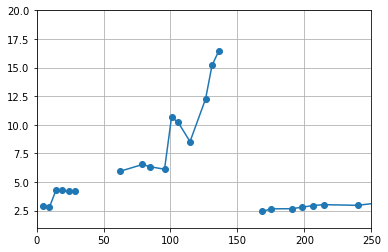

In [314]:
plt.plot(road_rides.distance, gear_ratios, "o-")
plt.ylim(1, 20)
plt.xlim(0, 250)
plt.grid()
plt.show()

In [330]:
road_rides.groupby("gear").speed.mean()

gear
34/11            8.820608
34/12            8.809638
34/13            7.879116
34/14            6.566000
34/15            5.716090
34/17            5.324280
34/19            4.784509
34/21            4.798988
34/23            4.487025
34/25            4.057477
34/28            3.298991
50/11            5.732553
50/12           12.200234
50/13           11.396860
50/14           10.353715
50/15            9.758084
50/17            8.973783
freewheeling     9.938270
Name: speed, dtype: float64

The mean speed at 50/11 is much lower than the expected. TODO: why?

In [331]:
road_rides.groupby("gear").cadence.mean()

gear
34/11           83.726872
34/12           86.692446
34/13           85.564835
34/14           77.530864
34/15           73.796334
34/17           75.071571
34/19           75.966038
34/21           84.690909
34/23           86.480296
34/25           85.147208
34/28           77.948171
50/11           38.726397
50/12           83.363636
50/13           84.127907
50/14           82.742268
50/15           83.782222
50/17           82.217391
freewheeling    13.599876
Name: cadence, dtype: float64

It is possible the rider to be moving by inertia, i.e. the cadence is zero (or close to) and the bike is moving. A criteria for minimum cadence should be established. 

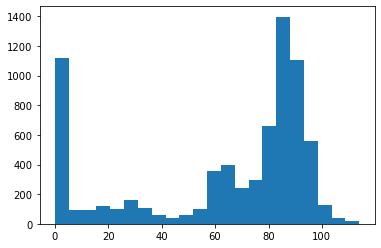

In [77]:
plt.hist(road_rides.cadence, bins="fd")
plt.show()

In [ ]:
road_rides_powered = road_rides[road_rides.cadence > 40] 
# other possible approach is to filter by max available gear ratio
plt.scatter(road_rides_powered.distance, road_rides_powered.gear_r, s=1)
plt.ylim(-2, 20)

In [ ]:
gear_ratios_below10 = gear_ratios[gear_ratios < 10.0]

In [ ]:
plt.hist(road_rides_powered.gear_r, bins = 30)
plt.show()

In [ ]:
road_rides_powered = road_rides_powered.dropna()

In [ ]:
road_rides_powered.corr()

In [ ]:
plt.scatter(road_rides_powered.gear_r, road_rides_powered.speed, s=1)

In [ ]:
plt.scatter(road_rides_powered.gear_r, road_rides_powered.slope, s=1)

In [ ]:
plt.scatter(road_rides_powered.slope, road_rides_powered.speed, s=1)
plt.xlabel("slope")
plt.ylabel("speed")
plt.xlim(-0.1, 0.2)
plt.show()

Very interesting graph. It outlines point families on certain curves. These curves represent the gear ratios. Note how the length of the curve indicates it's usable range.

In [ ]:
# 3debug
# road_rides_powered.slope

In [ ]:
x = np.linspace(0.01, 0.2, 20)
# coef = 
y = 8* 0.07/x
y2 = 8* 0.08/x

plt.figure(figsize=(12, 12))
plt.plot(x, y, color="red")
plt.plot(x, y2, color="red")

plt.hist2d(road_rides_powered.slope, road_rides_powered.speed, bins=300, cmap=plt.cm.jet, cmin=1, cmax=10)
plt.title("")
plt.xlabel("slope")
plt.ylabel("speed, m/s")
# plt.gca().set_aspect('equal')
plt.xlim(-0.1, 0.2)
plt.grid()
plt.plot()

The strange line pattern collide with the equation slope * speed = const, or 
(d(amplitude) / d(distance)) * (d(distance) / dt) =d(amplitude) / dt = const

In [ ]:
road_rides_powered.reset_index(inplace=True)

In [ ]:
road_rides_powered[(road_rides_powered.slope * road_rides_powered.speed > 8*0.07) & (road_rides_powered.slope * road_rides_powered.speed < 8*0.08)]

In [ ]:
road_rides_powered[835:840]

In [ ]:
(road_rides_powered.altitude.iloc[837] - road_rides_powered.altitude.iloc[836] ) / (road_rides_powered.distance.iloc[837] - road_rides_powered.distance.iloc[836] )

Let's try to plot the cadence as contour on the graph above. 

In [ ]:
sns.set_theme(style="white")

sns.relplot(x="slope", y="speed", hue="cadence",
            alpha=.5, palette=sns.color_palette("flare", as_cmap=True),
            height=6, data=road_rides_powered)
plt.xlim(-0.1, 0.2)
plt.show()

In [ ]:
plt.scatter(road_rides_powered.slope, road_rides_powered.cadence, s=1)

In [ ]:
plt.scatter(road_rides_powered.cadence, road_rides_powered.slope, s=1)


In [ ]:
gear_ratios.name = "gear_r"
road_rides = pd.concat([road_rides, gear_ratios], axis=1)

In [ ]:
road_rides[(road_rides.gear_r > 20) & (road_rides.gear_r < 100)]

## Slopes

In [ ]:
slopes = {0: np.nan}
for i in range(1, len(road_rides)):
    delta_dist = (road_rides.distance.iloc[i] - road_rides.distance.iloc[i-1]) 
    if delta_dist != 0.0 and \
        road_rides.speed.iloc[i] > 1 and \
        road_rides.speed.iloc[i-1] > 1: # to make sure the rider is moving
        slopes[i] = (road_rides.altitude.iloc[i] - road_rides.altitude.iloc[i-1]) / delta_dist
        
    else:
        slopes[i] = np.nan
slopes = pd.Series(slopes)
slopes.name = "slope"

In [ ]:
road_rides = pd.concat([road_rides, slopes], axis=1)

In [ ]:
road_rides

More columns will be added to aid the analysis.

In [ ]:
road_rides.corr()

In [ ]:
plt.scatter(road_rides.speed, road_rides.slope, s=1)
# plt.ylim(-1, 1)

In [ ]:
plt.scatter(road_rides.distance, road_rides.altitude, s=1)

In [ ]:
plt.scatter(road_rides.distance, road_rides.slope, s=1)

In [ ]:
y = road_rides.slope.rolling(50, win_type='triang').mean()
plt.scatter(road_rides.distance, y, s=1)

In [ ]:
grads = np.gradient(road_rides.altitude, road_rides.distance, edge_order=2)

kernel_size = 20
kernel = np.ones(kernel_size) / kernel_size
grads_convolved_10 = np.convolve(grads, kernel, mode='same')

plt.figure(figsize=(16,8))
plt.scatter(road_rides.distance, grads, s=1)
plt.plot(road_rides.distance, grads_convolved_10, color="red")
plt.ylim(-0.1, 0.1)

In [ ]:
road_rides[road_rides.slope < -0.2]

In [ ]:
road_rides[150:170]

In [ ]:
plt.hist(road_rides.heart_rate, bins="fd")
plt.show()

In [ ]:
plt.hist(road_rides.cadence, bins="fd")
plt.show()

In [ ]:
plt.scatter(road_rides.cadence, road_rides.heart_rate, s=1)
plt.show()

In [ ]:
plt.plot(road_rides.distance, road_rides.altitude)
plt.show()

In [ ]:
road_rides.cadence.mean()

In [ ]:
road_rides[road_rides.cadence < 10]

In [ ]:
records_df = get_dataframe(r"data\2021-06-28-12-06-56.fit")

In [ ]:
records_df

In [ ]:
road_rides.sample(10)

In [ ]:
plt.plot(road_rides.distance, road_rides.speed)

In [ ]:
road_rides.describe().T

In [ ]:
records_df.distance.tail(1).tolist()[0]

In [ ]:
plt.plot(records_df.timestamp, records_df.temperature)

In [ ]:
records_df.dtypes

In [ ]:
records_df.altitude.hist(bins=20, density=True)
plt.xlabel("altitude")
plt.ylabel("count")
plt.show()

In [ ]:
plt.plot(records_df.distance, records_df.speed)

In [ ]:
plt.plot(records_df.distance, records_df.altitude)

In [ ]:
plt.plot(records_df.distance, records_df.heart_rate)

In [ ]:
records_df.corr()

# References
https://towardsdatascience.com/parsing-fitness-tracker-data-with-python-a59e7dc17418
